# L09 - DNN

## Author - Rodolfo Lerma

# Problem:
Using the CIFAR-10 dataset, create a new notebook to build a TensorlLow model.


# Abstract:
You start working for a new startup building the next generation search engine. The search engine provides the ability to search images with their content. You are tasked to build a machine learning model that is able to identify the objects in images. The model you are building will help in providing the capability to search for 10 objects. Download the L09_ImageClasses.pdf to see a list of the classes in the dataset and 10 random images from each class.

For this project you will use the CIFAR-10 dataset, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The analysis is is divided the following way:

### Data Exploration
- **Visual Exploration of the variables**
    - Categorical Variable

### Analysis
- **SVC review**
    - Split Data Set
        
### Summary of Findings

- Read CIFAR-10 dataset from Keras.
- Explore data
- Preprocess and prepare data for classification
- Build a TensorFlow model using a single dense hidden layer
- Apply model to test set and evaluate accuracy
- Perform 3 adjusts to the number of layers and activation functions to improve accuracy
- Summarize your findings regarding the different iterations and any insights gained

# Data Exploration 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

In [3]:
data = tf.keras.datasets.cifar10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes in the data set represent the following:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. 

In [4]:
(x_train, y_train), (x_test, y_test) = data.load_data()

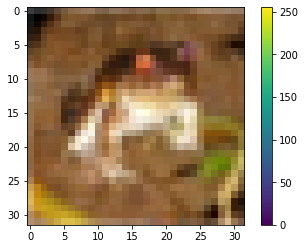

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

We notice that the image is 255 x 255 pixels. As a result, we will scale the values to range between 0 and 1, and thus we will divide by 255.0.

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

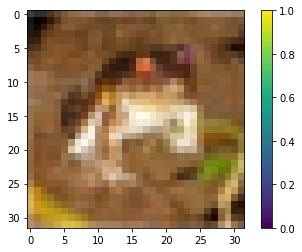

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
def names_function(y_train):
    names = []
    for i in y_train:
        if i == 1:
            j = 'car'
        elif i == 2:
            j = 'bird'
        elif i == 3:
            j = 'cat'
        elif i == 4:
            j = 'deer'
        elif i == 5:
            j = 'dog'
        elif i == 6:
            j = 'frog'
        elif i == 7:
            j = 'horse'
        elif i == 8:
            j = 'ship'
        elif i == 9:
            j = 'truck'
        elif i == 0:
            j = 'airplane'
        names.append(j)
    return names
    
names_train = names_function(y_train)

In [18]:
names_test = names_function(y_test)

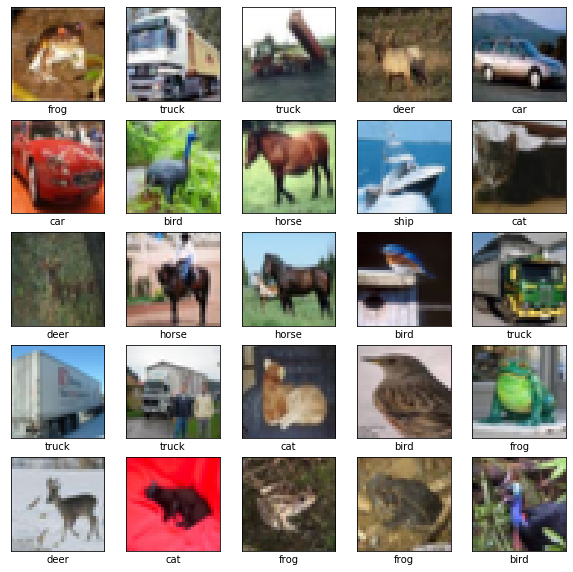

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(names_train[i])
plt.show()

In [48]:
def breast_cancer_model(x_train, y_train, x_val, y_val, params):

    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss=params['losses'],
                  optimizer=params['optimizer'],
                  metrics=['acc', talos.utils.metrics.f1score])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        callbacks=[talos.utils.live()],
                        epochs=params['epochs'],
                        verbose=0)

    return history, model

In [49]:
p = {'first_neuron':[50,200,500],
     'hidden_layers':[1,2,3],
     'batch_size': [200,500,1500],
     'epochs': [10,20,30],
     'dropout': [0],
     'kernel_initializer': ['uniform','normal'],
     'optimizer': ['Nadam', 'Adam'],
     'losses': ['sparse_categorical_crossentropy'],
     'activation':['relu', 'elu'],
     'last_activation': ['softmax']}

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

From the **TensorFlow** library these are some of the options available:

### Optimizer options:

- `sgd`: Gradient Descent with momentum
- `rmsprop`: Optimizer that implements the RMSprop algorithm
- `optimizer`: Base class for Keras
- `nadam`: NAdam algorithm
- `ftrl`: FTRL algorithm
- `adam`: Adam algorithm
- `adagrad`: Adagrad algorithm
- `adadelta`: Adadelta algorithm


### Loss options (for classification):

- `BinaryCrossentropy` class
- `CategoricalCrossentropy` class
- `SparseCategoricalCrossentropy` class
- `Poisson` class
- `binary_crossentropy` function
- `categorical_crossentropy` function
- `sparse_categorical_crossentropy` function
- `poisson` function
- `KLDivergence` class
- `kl_divergence` function

### Metrics (accuracy):

- `Accuracy` class
- `BinaryAccuracy` class
- `CategoricalAccuracy` class
- `TopKCategoricalAccuracy` class
- `SparseTopKCategoricalAccuracy` class

**Others:**

- `AUC` class
- `Precision` class
- `Recall` class
- `TruePositives` class
- `TrueNegatives` class
- `FalsePositives` class
- `FalseNegatives` class
- `PrecisionAtRecall` class
- `SensitivityAtSpecificity` class
- `SpecificityAtSensitivity` class

In [46]:
model.compile(optimizer= 'adam',
              loss='KLDivergence',
              metrics=['accuracy'])

# model.compile(optimizer='adam', 
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


In [47]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 24s 15ms/step - loss: 20.7120 - accuracy: 0.1048
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 20.6891 - accuracy: 0.0999
Epoch 3/5
1563/1563 [==============================] - 26s 17ms/step - loss: 20.7118 - accuracy: 0.0968
Epoch 4/5
1563/1563 [==============================] - 32s 20ms/step - loss: 20.7405 - accuracy: 0.1012
Epoch 5/5
1563/1563 [==============================] - 26s 17ms/step - loss: 20.7210 - accuracy: 0.0992


In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.4682 - accuracy: 0.4799
Test accuracy: 0.4799000024795532


In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
y_test[0]

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions[i]), 100*np.max(predictions), names_test[i]))
plt.show()

# Summary of Findings

